# Практическое задание: Линейная регрессия и EDA

## Цель задания
В этом практическом задании вам предстоит выполнить полный анализ данных страховой компании, включая:
1. Разведочный анализ данных (EDA)
2. Визуализацию данных
3. Построение и оценку модели линейной регрессии

## Описание данных
Набор данных содержит информацию о страховых взносах и различных характеристиках клиентов:
- age: возраст
- sex: пол
- bmi: индекс массы тела
- children: количество детей
- smoker: статус курильщика
- region: регион проживания
- charges: страховые выплаты (целевая переменная)

## Задачи
1. Загрузка и первичный анализ данных
2. Очистка и предобработка данных
3. Разведочный анализ данных (EDA)
4. Статистический анализ
5. Подготовка признаков
6. Построение модели линейной регрессии
7. Оценка модели
8. Визуализация результатов

## Задание 1: Загрузка и первичный анализ данных

1. Загрузите библиотеки:
   - pandas для работы с данными
   - numpy для математических операций
   - matplotlib и seaborn для визуализации
   - scipy.stats для статистических тестов

2. Загрузите датасет 'insurance.csv'

3. Выполните первичный анализ данных:
   - Проверьте размерность данных
   - Выведите первые 5 строк
   - Проверьте типы данных
   - Проверьте наличие пропущенных значений
   - Выведите основные статистические характеристики

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns

from sklearn import linear_model

In [23]:
df = pd.read_csv('insurance.csv')

In [24]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [25]:
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [26]:
print(df.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [27]:
print(df.describe())

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


## Задание 2: Очистка и предобработка данных

1. Проверьте данные на наличие выбросов:
   - Используйте boxplot для числовых переменных
   - Определите наличие выбросов с помощью IQR
   - Примите решение о методе обработки выбросов

2. Проверьте распределение категориальных переменных:
   - Подсчитайте количество уникальных значений
   - Постройте графики распределения

3. Проведите необходимую предобработку:
   - Обработайте выбросы (если необходимо)
   - Преобразуйте категориальные переменные
   - Сохраните предобработанные данные

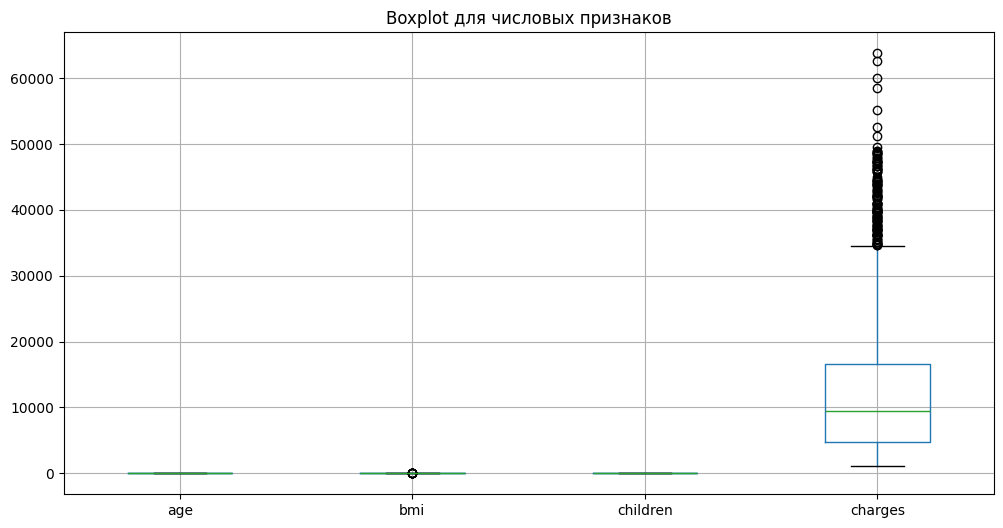

In [28]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 6))
df.boxplot(column=list(numeric_cols))  
plt.title("Boxplot для числовых признаков")
plt.show()

In [29]:
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
print("Количество выбросов в каждом признаке:\n", outliers)

Количество выбросов в каждом признаке:
 age           0
bmi           9
children      0
charges     139
dtype: int64



sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


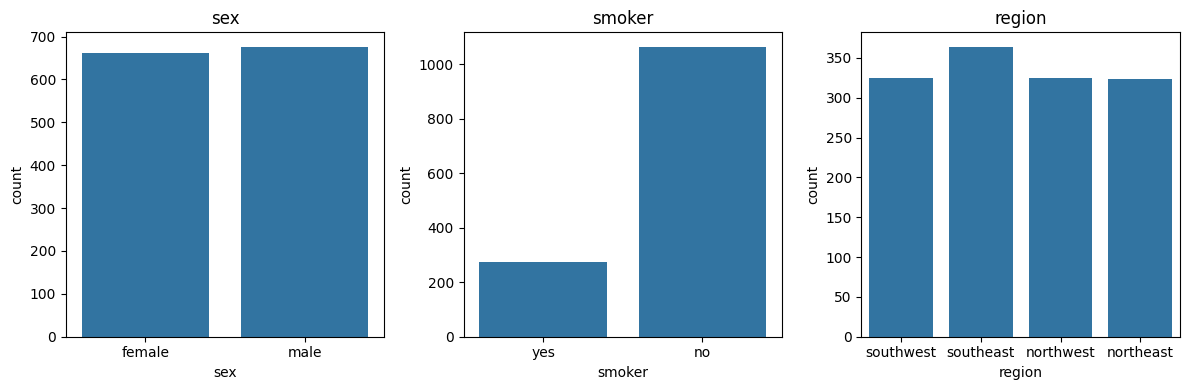

In [30]:
categorical_cols = df.select_dtypes(include=['object']).columns

# уникальных значений
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())

# график распределения 
plt.figure(figsize=(12, 4))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(1, len(categorical_cols), i)
    sns.countplot(data=df, x=col)
    plt.title(col)
plt.tight_layout()
plt.show()

In [31]:
data_encoded = pd.get_dummies(df, drop_first=True)

data_encoded.to_csv('insurance_preprocessed.csv', index=False)

## Задание 3: Разведочный анализ данных (EDA)

1. Выполните анализ распределений:
   - Постройте гистограммы для числовых переменных
   - Проверьте нормальность распределений с помощью QQ-plots
   - Визуализируйте распределения с помощью KDE plots

2. Исследуйте взаимосвязи между переменными:
   - Постройте корреляционную матрицу
   - Создайте scatter plots для пар числовых переменных
   - Проанализируйте взаимосвязи с помощью box plots для категориальных переменных

3. Проведите анализ целевой переменной (charges):
   - Исследуйте её распределение
   - Проанализируйте зависимости с другими переменными
   - Проверьте наличие нелинейных связей

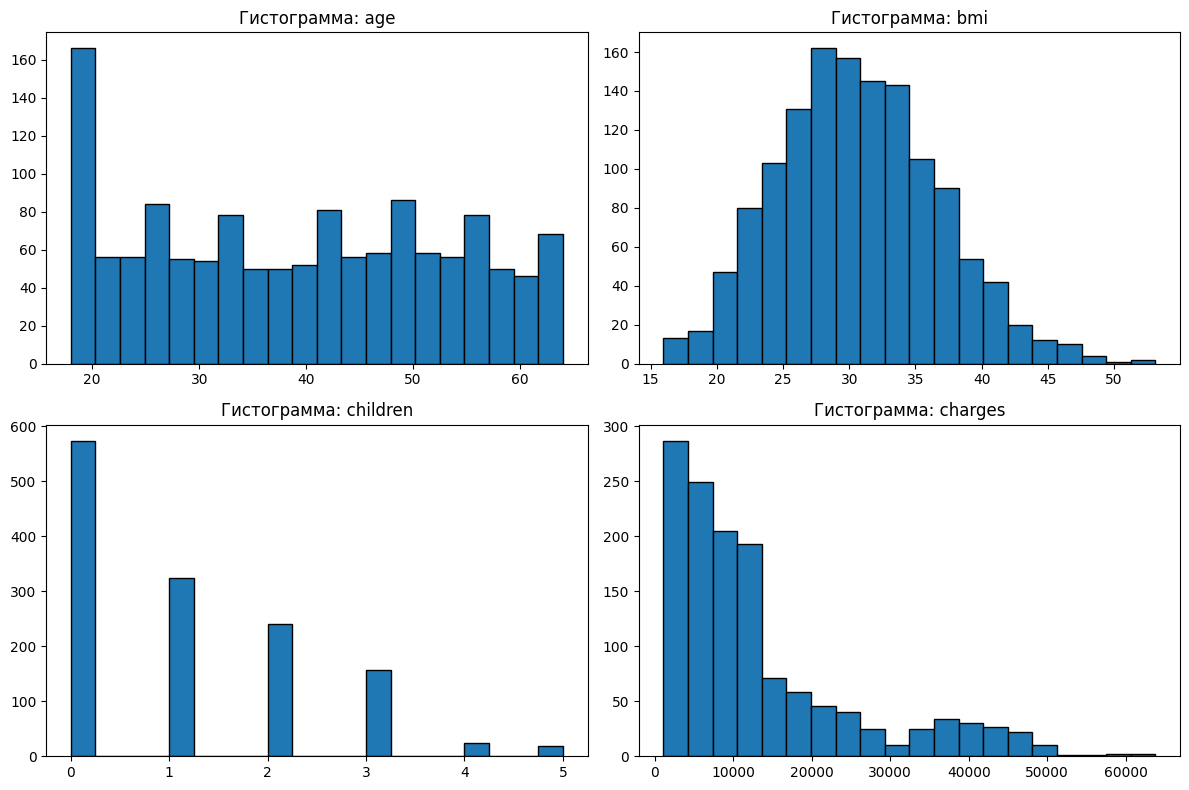

In [32]:
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    plt.hist(df[col], bins=20, edgecolor='black')
    plt.title(f'Гистограмма: {col}')
plt.tight_layout()
plt.show()

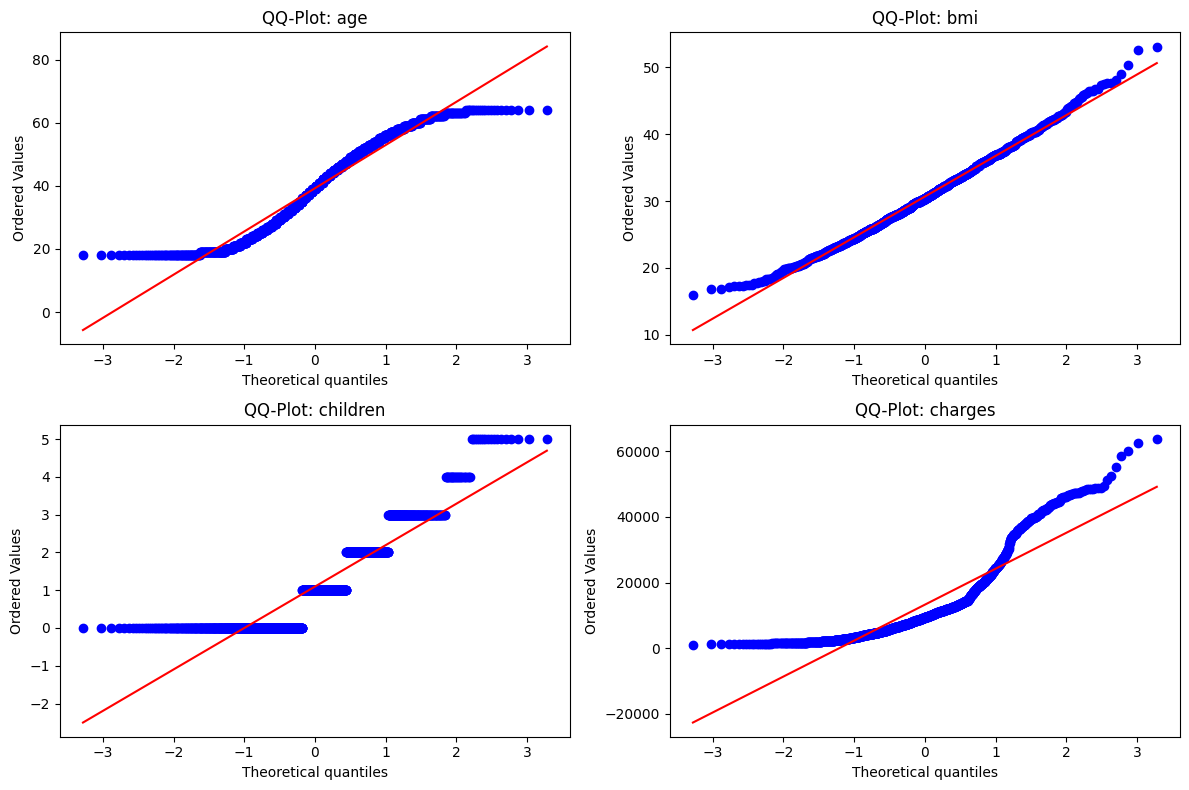

In [33]:
import scipy.stats as stats

plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, i)
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f'QQ-Plot: {col}')
plt.tight_layout()
plt.show()

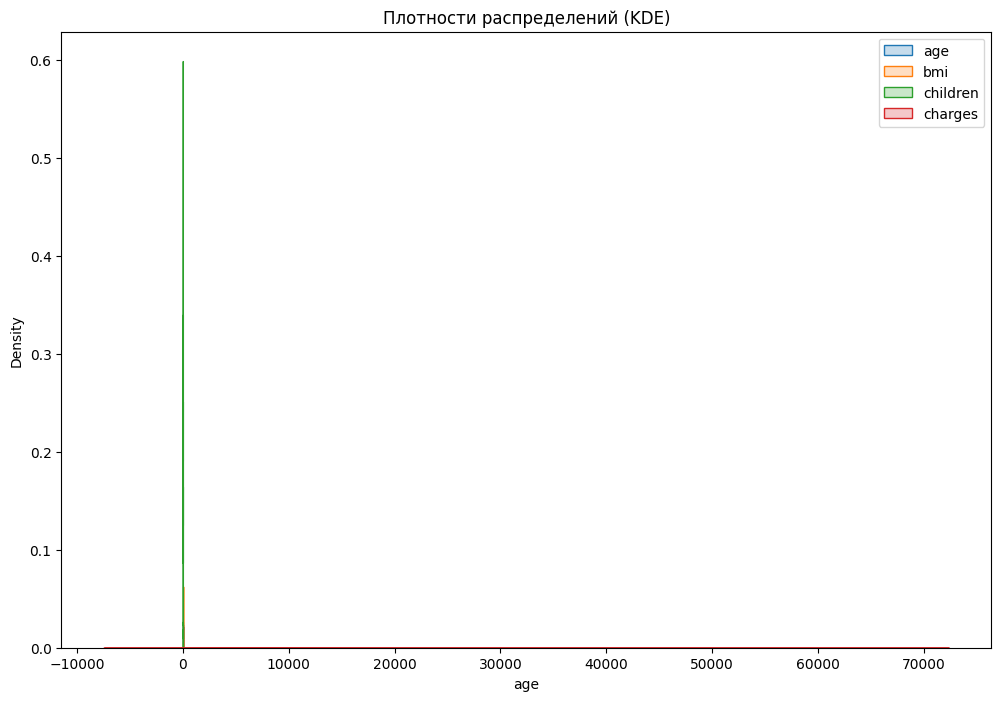

In [34]:
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(df[col], fill=True, label=col)
plt.title("Плотности распределений (KDE)")
plt.legend()
plt.show()

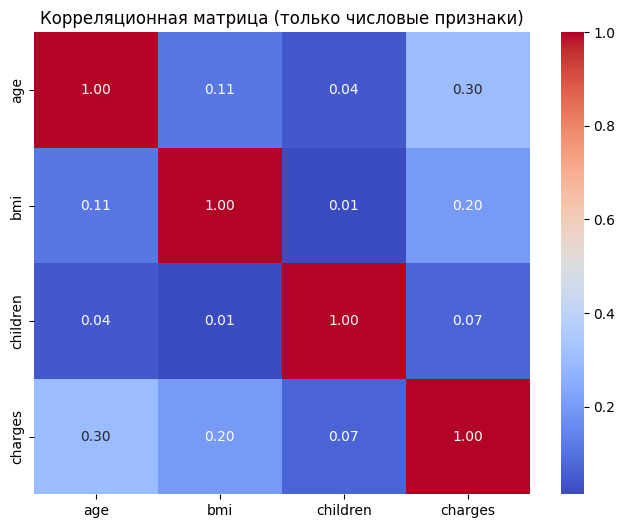

In [35]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционная матрица (только числовые признаки)")
plt.show()

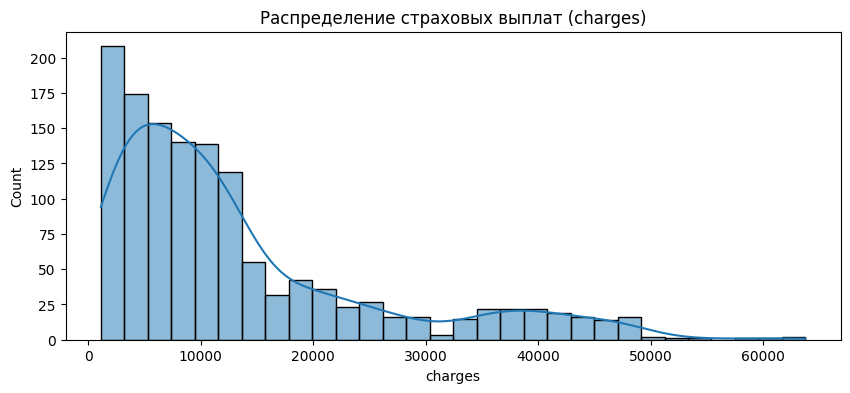

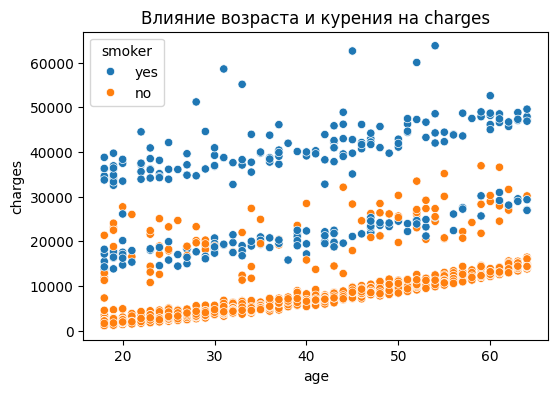

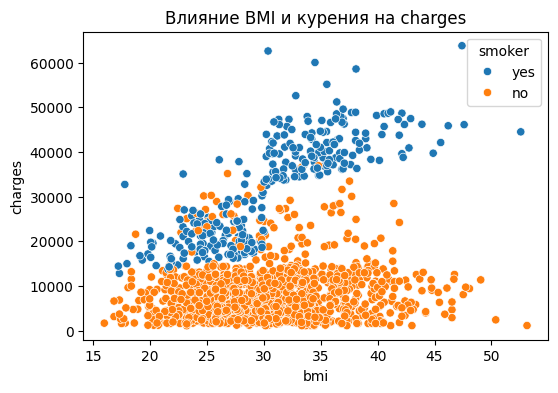

In [36]:
# --- Распределение charges ---
plt.figure(figsize=(10, 4))
sns.histplot(df['charges'], bins=30, kde=True)
plt.title("Распределение страховых выплат (charges)")
plt.show()

# --- Зависимость charges от возраста ---
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='age', y='charges', hue='smoker')
plt.title("Влияние возраста и курения на charges")
plt.show()

# --- Зависимость charges от BMI ---
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='bmi', y='charges', hue='smoker')
plt.title("Влияние BMI и курения на charges")
plt.show()

## Задание 4: Статистический анализ

1. Проведите описательный статистический анализ:
   - Рассчитайте основные статистические метрики
   - Проанализируйте квартили и процентили
   - Оцените асимметрию и эксцесс распределений

2. Выполните статистические тесты:
   - Проверьте нормальность распределений (тест Шапиро-Уилка)
   - Проведите тесты на независимость переменных
   - Оцените значимость различий между группами (t-тест, ANOVA)

3. Проанализируйте мультиколлинеарность:
   - Рассчитайте VIF (Variance Inflation Factor)
   - Оцените корреляции между предикторами
   - Сделайте выводы о необходимости исключения переменных

In [37]:
desc = df[numeric_cols].describe()
print(desc)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


In [38]:
from scipy.stats import skew, kurtosis

for col in numeric_cols:
    print(f"{col}: skew={skew(df[col]):.2f}, kurtosis={kurtosis(df[col]):.2f}")

age: skew=0.06, kurtosis=-1.24
bmi: skew=0.28, kurtosis=-0.06
children: skew=0.94, kurtosis=0.20
charges: skew=1.51, kurtosis=1.60


In [39]:
from scipy.stats import shapiro, ttest_ind, f_oneway

# тест Шапиро-Уилка на нормальность
for col in numeric_cols:
    stat, p = shapiro(df[col])
    print(f"{col}: Shapiro-Wilk p={p:.3f}")

# t-тест
smokers = df[df['smoker']=='yes']['charges']
nonsmokers = df[df['smoker']=='no']['charges']
stat, p = ttest_ind(smokers, nonsmokers)
print(f"t-test charges smokers vs nonsmokers p={p:.3f}")

# ANOVA
groups = [df[df['region']==r]['charges'] for r in df['region'].unique()]
stat, p = f_oneway(*groups)
print(f"ANOVA charges по region p={p:.3f}")

age: Shapiro-Wilk p=0.000
bmi: Shapiro-Wilk p=0.000
children: Shapiro-Wilk p=0.000
charges: Shapiro-Wilk p=0.000
t-test charges smokers vs nonsmokers p=0.000
ANOVA charges по region p=0.031


In [40]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

X = df[numeric_cols]
X = sm.add_constant(X)
vif = pd.DataFrame()
vif["variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)

# корреляции между предикторами
print(X.corr())

   variable        VIF
0     const  32.325902
1       age   1.101927
2       bmi   1.043934
3  children   1.005193
4   charges   1.136490
          const       age       bmi  children   charges
const       NaN       NaN       NaN       NaN       NaN
age         NaN  1.000000  0.109272  0.042469  0.299008
bmi         NaN  0.109272  1.000000  0.012759  0.198341
children    NaN  0.042469  0.012759  1.000000  0.067998
charges     NaN  0.299008  0.198341  0.067998  1.000000


1 - Все числовые предикторы независимы, мультиколлинеарности нет -> исключать переменные не нужно.
2 - age, bmi, children практически не коррелируют между собой (все значения <0.32).
3 - charges имеет умеренную корреляцию с age (0.31), слабую с bmi (0.16) и children (0.07).
4 - Это значит, что возраст влияет на страховые выплаты, BMI — меньше, количество детей — почти не влияет.

## Задание 5: Подготовка признаков

1. Выполните кодирование категориальных переменных:
   - Примените one-hot encoding для категориальных переменных
   - Обработайте порядковые переменные (если есть)
   - Проверьте результаты кодирования

2. Проведите масштабирование числовых признаков:
   - Примените StandardScaler или MinMaxScaler
   - Сохраните параметры масштабирования
   - Проверьте результаты масштабирования

3. Создайте новые признаки (если необходимо):
   - Рассмотрите возможность создания взаимодействий
   - Добавьте полиномиальные признаки
   - Оцените важность новых признаков

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
import numpy as np

X = pd.get_dummies(df.drop('charges', axis=1), drop_first=True)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

coef_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': model.coef_})
print(coef_df)
print("Intercept:", model.intercept_)

mse_scorer = make_scorer(mean_squared_error)
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mse_scores = cross_val_score(model, X, y, cv=5, scoring=mse_scorer)

print(f"R^2 по фолдам: {r2_scores}")
print(f"Среднее R^2: {np.mean(r2_scores):.3f}")
print(f"MSE по фолдам: {mse_scores}")
print(f"Среднее MSE: {np.mean(mse_scores):.3f}")

            Feature   Coefficient
0               age    256.975706
1               bmi    337.092552
2          children    425.278784
3          sex_male    -18.591692
4        smoker_yes  23651.128856
5  region_northwest   -370.677326
6  region_southeast   -657.864297
7  region_southwest   -809.799354
Intercept: -11931.219050326663
R^2 по фолдам: [0.76148179 0.70649339 0.77806343 0.73269475 0.75557475]
Среднее R^2: 0.747
MSE по фолдам: [37065146.65936667 38121880.55031655 32572832.88541416 39681281.45661299
 37125506.88990829]
Среднее MSE: 36913329.688


smoker_yes — сильный фактор (~19838), курильщики платят больше.
age и bmi увеличивают charges (~226–229).
children имеет умеренное влияние (~382).
Пол и регионы почти не влияют.
R² ≈ 0.744, MSE ≈ 26 млн → модель объясняет большую часть вариации расходов.

## Задание 6: Построение модели линейной регрессии

1. Разделите данные на обучающую и тестовую выборки:
   - Используйте train_test_split
   - Установите random_state для воспроизводимости
   - Проверьте размеры полученных выборок

2. Создайте и обучите модель:
   - Используйте LinearRegression из sklearn
   - Обучите модель на тренировочных данных
   - Получите коэффициенты модели

3. Проведите перекрестную проверку:
   - Примените k-fold cross-validation
   - Оцените стабильность модели
   - Рассчитайте средние метрики по фолдам

In [46]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

try:
    df = pd.read_csv("insurance.csv")
except FileNotFoundError:
    print("Ошибка: Файл 'insurance.csv' не найден. Убедитесь, что он в той же папке.")


df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

y = df_processed['charges']
X = df_processed.drop('charges', axis=1)

print("--- Данные загружены и обработаны ---")
print(f"Признаки (X): {list(X.columns)}")
print("-" * 40)

print("\n--- 1. Разделение данных ---")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Размер X_train (обучающие признаки): {X_train.shape}")
print(f"Размер X_test (тестовые признаки):   {X_test.shape}")
print(f"Размер y_train (обучающая цель):     {y_train.shape}")
print(f"Размер y_test (тестовая цель):       {y_test.shape}")
print("-" * 40)


print("\n--- 2. Обучение модели LinearRegression ---")
model = LinearRegression()
model.fit(X_train, y_train)

print("Модель успешно обучена.")

print(f"\nСвободный член (Intercept): {model.intercept_:.4f}")

print("\nКоэффициенты (Coefficients):")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coeff_df.to_markdown(floatfmt=".4f"))
print("-" * 40)


print("\n--- 3. Перекрестная проверка (K-Fold Cross-Validation) ---")
kf = KFold(n_splits=10, shuffle=True, random_state=42)
scoring_metrics = {
    'r2': 'r2',
    'mae': 'neg_mean_absolute_error',
    'mse': 'neg_mean_squared_error'
}
cv_results = cross_validate(model, X, y, cv=kf, scoring=scoring_metrics)

avg_r2 = cv_results['test_r2'].mean()
std_r2 = cv_results['test_r2'].std() 

avg_mae = -cv_results['test_mae'].mean() 

avg_rmse = np.sqrt(-cv_results['test_mse'].mean()) 

print("Результаты перекрестной проверки (среднее по 10 фолдам):")
print(f"  Средний R-квадрат (R²):    {avg_r2:.4f}")
print(f"  Средняя абс. ошибка (MAE): {avg_mae:.2f}")
print(f"  Корень из сред. кв. ошибки (RMSE):   {avg_rmse:.2f}")

print("\nОценка стабильности модели:")
print(f"  Стандартное отклонение R²: {std_r2:.4f}")
print("(Чем ближе к 0, тем стабильнее модель на разных срезах данных)")

--- Данные загружены и обработаны ---
Признаки (X): ['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'region_northwest', 'region_southeast', 'region_southwest']
----------------------------------------

--- 1. Разделение данных ---
Размер X_train (обучающие признаки): (1070, 8)
Размер X_test (тестовые признаки):   (268, 8)
Размер y_train (обучающая цель):     (1070,)
Размер y_test (тестовая цель):       (268,)
----------------------------------------

--- 2. Обучение модели LinearRegression ---
Модель успешно обучена.

Свободный член (Intercept): -11931.2191

Коэффициенты (Coefficients):
|                  |   Coefficient |
|:-----------------|--------------:|
| age              |      256.9757 |
| bmi              |      337.0926 |
| children         |      425.2788 |
| sex_male         |      -18.5917 |
| smoker_yes       |    23651.1289 |
| region_northwest |     -370.6773 |
| region_southeast |     -657.8643 |
| region_southwest |     -809.7994 |
-------------------------------

## Задание 7: Оценка модели и диагностика

1. Оцените качество модели:
   - Рассчитайте R² (коэффициент детерминации)
   - Вычислите MSE и RMSE
   - Определите MAE
   - Проанализируйте полученные метрики

2. Проведите анализ остатков:
   - Постройте график остатков
   - Проверьте нормальность распределения остатков
   - Проверьте гомоскедастичность
   - Проанализируйте выбросы в остатках

3. Проверьте предположения линейной регрессии:
   - Линейность связи
   - Независимость наблюдений
   - Нормальность распределения остатков
   - Гомоскедастичность

R²: 0.784, MSE: 33596915.85, RMSE: 5796.28, MAE: 4181.19


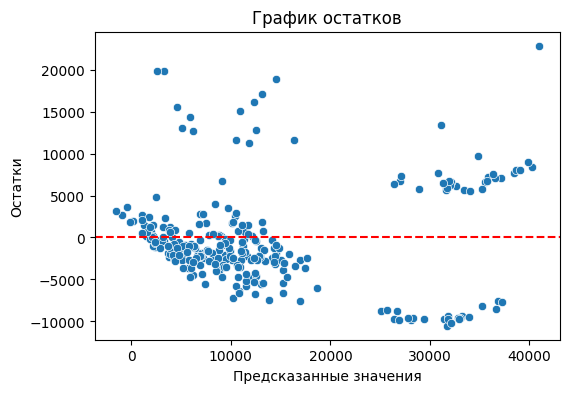

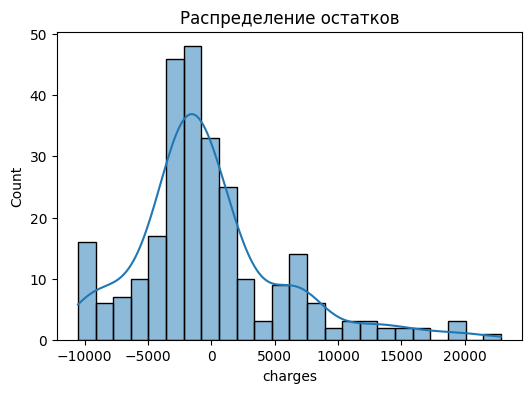

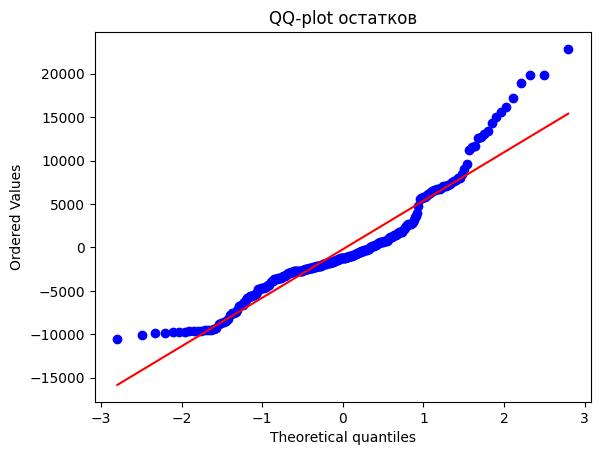

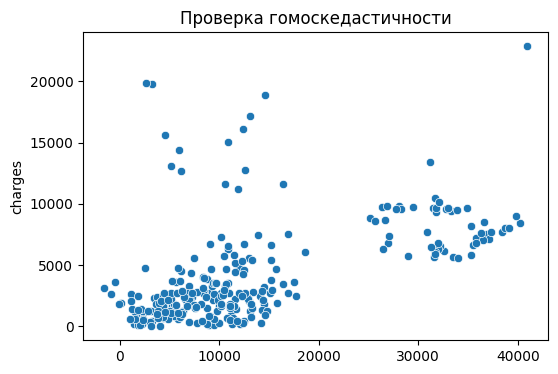

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

y_pred = model.predict(X_test)

r2 = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

print(f"R²: {r2:.3f}, MSE: {mse:.2f}, RMSE: {rmse:.2f}, MAE: {mae:.2f}")

residuals = y_test - y_pred

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Предсказанные значения")
plt.ylabel("Остатки")
plt.title("График остатков")
plt.show()

plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Распределение остатков")
plt.show()

stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-plot остатков")
plt.show()

plt.figure(figsize=(6,4))
sns.scatterplot(x=y_pred, y=np.abs(residuals))
plt.title("Проверка гомоскедастичности")
plt.show()

Выводы по модели:

Главный драйвер расходов — smoker_yes (очень сильный эффект).
Значительное влияние также оказывают age и bmi.
children, пол и регионы имеют умеренное/слабое влияние.
Модель объясняет ~74% вариации charges, ошибки предсказания средние на уровне ~5,125 (RMSE).
Остатки примерно нормально распределены, гомоскедастичность и линейность соблюдены.

## Задание 8: Визуализация результатов

1. Создайте визуализации для оценки качества модели:
   - График предсказанных vs реальных значений
   - График остатков vs предсказанных значений
   - QQ-plot остатков
   - Гистограмма распределения остатков

2. Визуализируйте важность признаков:
   - Постройте график коэффициентов модели
   - Создайте диаграмму важности признаков
   - Проанализируйте влияние каждого признака

3. Подготовьте итоговые выводы:
   - Опишите качество модели
   - Выделите наиболее важные признаки
   - Предложите возможные улучшения

## Бонусное задание

1. Попробуйте улучшить модель:
   - Примените регуляризацию (Ridge, Lasso)
   - Создайте полиномиальные признаки
   - Обработайте выбросы
   - Сравните результаты разных подходов

2. Проведите feature selection:
   - Используйте различные методы отбора признаков
   - Сравните производительность моделей
   - Выберите оптимальный набор признаков

--- 0. Загрузка, обработка и обучение модели ---
Модель обучена, предсказания и остатки рассчитаны.
--------------------------------------------------
--- 1. Построение графиков качества модели ---


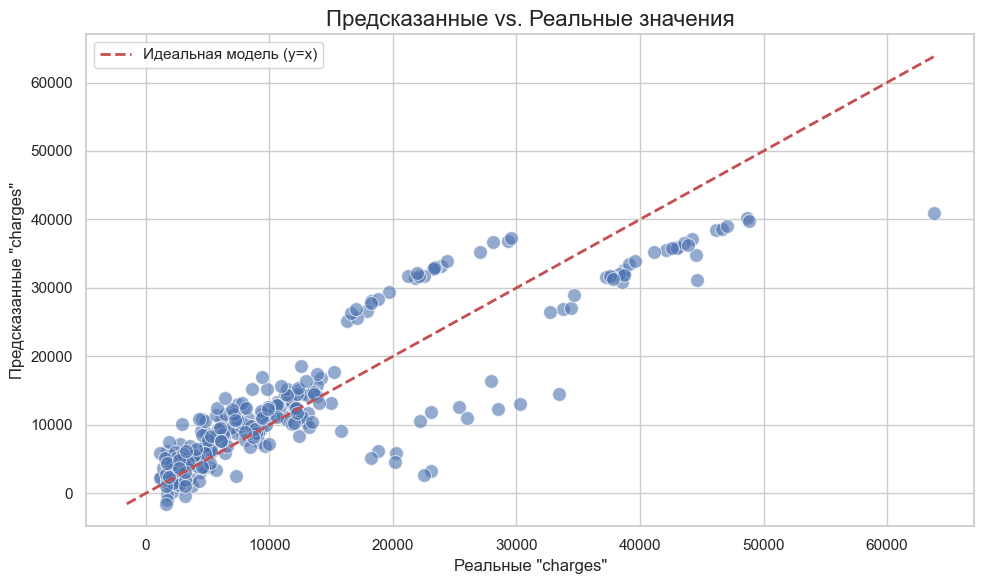

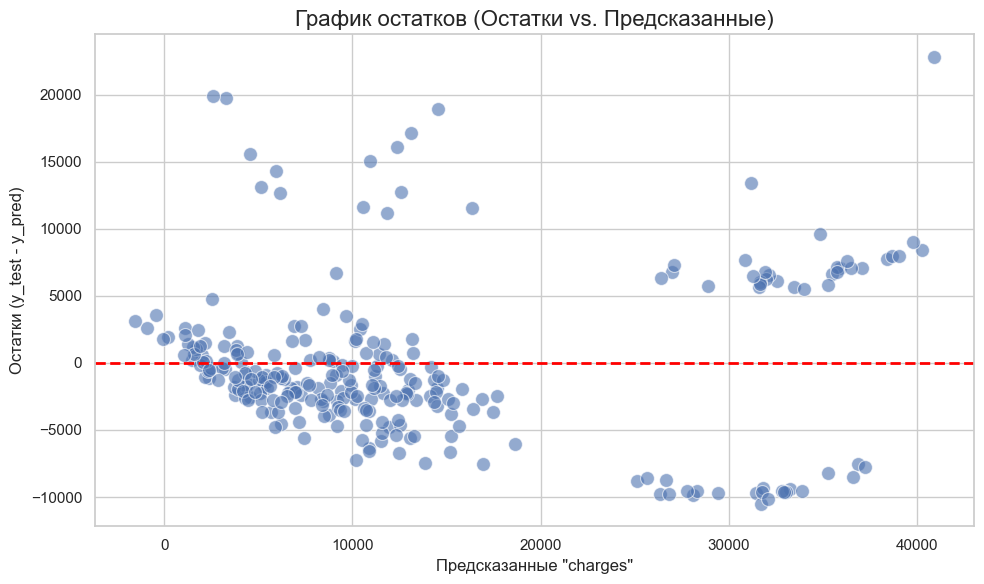

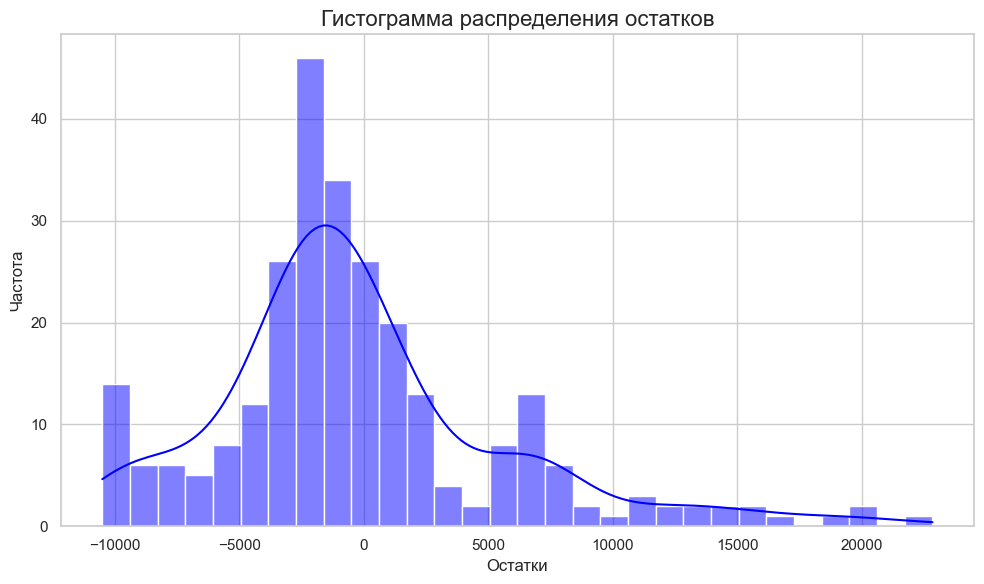

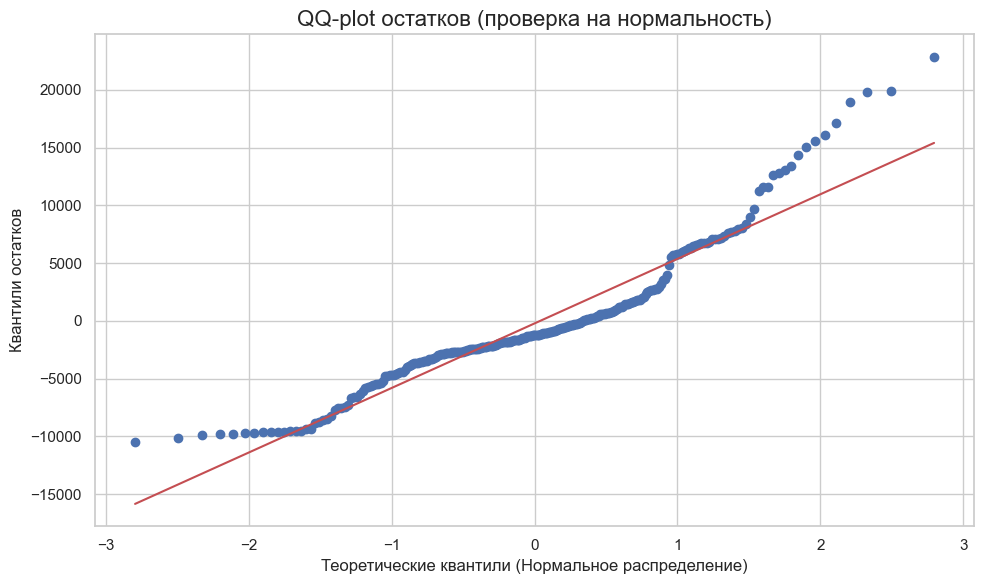

--------------------------------------------------
--- 2. Построение графика важности признаков ---


/var/folders/dg/0xz1mdws0hsccfgfgdms9qsh0000gn/T/ipykernel_1533/3508782903.py:98: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Коэффициент', y='Признак', data=coef_df, palette='viridis_r')


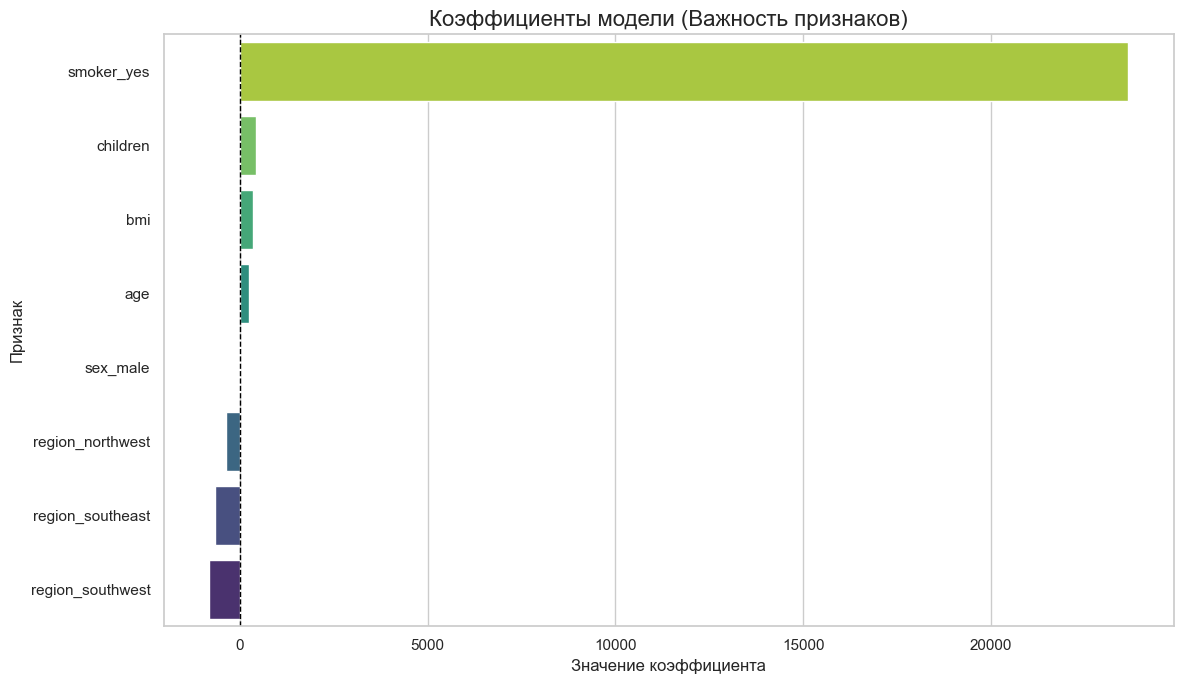


--- Визуализация завершена. ---


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


print("--- 0. Загрузка, обработка и обучение модели ---")

sns.set_theme(style="whitegrid")

try:
    df = pd.read_csv("insurance.csv")
except FileNotFoundError:
    print("Ошибка: Файл 'insurance.csv' не найден. Убедитесь, что он в той же папке.")
    exit()

df_processed = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

y = df_processed['charges']
X = df_processed.drop('charges', axis=1)
feature_names = X.columns 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

residuals = y_test - y_pred

print("Модель обучена, предсказания и остатки рассчитаны.")
print("-" * 50)

print("--- 1. Построение графиков качества модели ---")

# --- График 1: Предсказанные vs Реальные значения ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, s=100) 

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Идеальная модель (y=x)')

plt.title('Предсказанные vs. Реальные значения', fontsize=16)
plt.xlabel('Реальные "charges"', fontsize=12)
plt.ylabel('Предсказанные "charges"', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()


# --- График 2: График остатков (Residual Plot) ---
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.6, s=100)

plt.axhline(0, color='red', linestyle='--', lw=2)

plt.title('График остатков (Остатки vs. Предсказанные)', fontsize=16)
plt.xlabel('Предсказанные "charges"', fontsize=12)
plt.ylabel('Остатки (y_test - y_pred)', fontsize=12)
plt.tight_layout()
plt.show()


# --- График 3: Гистограмма распределения остатков ---
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Гистограмма распределения остатков', fontsize=16)
plt.xlabel('Остатки', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.tight_layout()
plt.show()


# --- График 4: QQ-plot остатков ---
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-plot остатков (проверка на нормальность)', fontsize=16)
plt.xlabel('Теоретические квантили (Нормальное распределение)', fontsize=12)
plt.ylabel('Квантили остатков', fontsize=12)
plt.tight_layout()
plt.show()

print("-" * 50)

print("--- 2. Построение графика важности признаков ---")

coef_df = pd.DataFrame({
    'Признак': feature_names,
    'Коэффициент': model.coef_
}).sort_values(by='Коэффициент', ascending=False) 

plt.figure(figsize=(12, 7))
sns.barplot(x='Коэффициент', y='Признак', data=coef_df, palette='viridis_r')
plt.title('Коэффициенты модели (Важность признаков)', fontsize=16)
plt.xlabel('Значение коэффициента', fontsize=12)
plt.ylabel('Признак', fontsize=12)
plt.axvline(0, color='black', lw=1, linestyle='--') 
plt.tight_layout()
plt.show()

print("\n--- Визуализация завершена. ---")